## BY YOGESH YADAV
## UNSUPERVISED ML

## TASK -2 From the given ‘Iris’ dataset, predict the optimum number of clusters
## and represent it visually.

In [1]:
#Import Important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Dataset using pandas library
path=r'C:\Users\yogesh yadav\Downloads\Grip\Task-2\Iris.csv'
df=pd.read_csv(path)

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# To check shape of dataset
df.shape

(150, 6)

In [5]:
# Check Null Value in dataset 
df.isnull().sum().sort_values(ascending=False)


Species          0
PetalWidthCm     0
PetalLengthCm    0
SepalWidthCm     0
SepalLengthCm    0
Id               0
dtype: int64

## So there is no null value in dataset

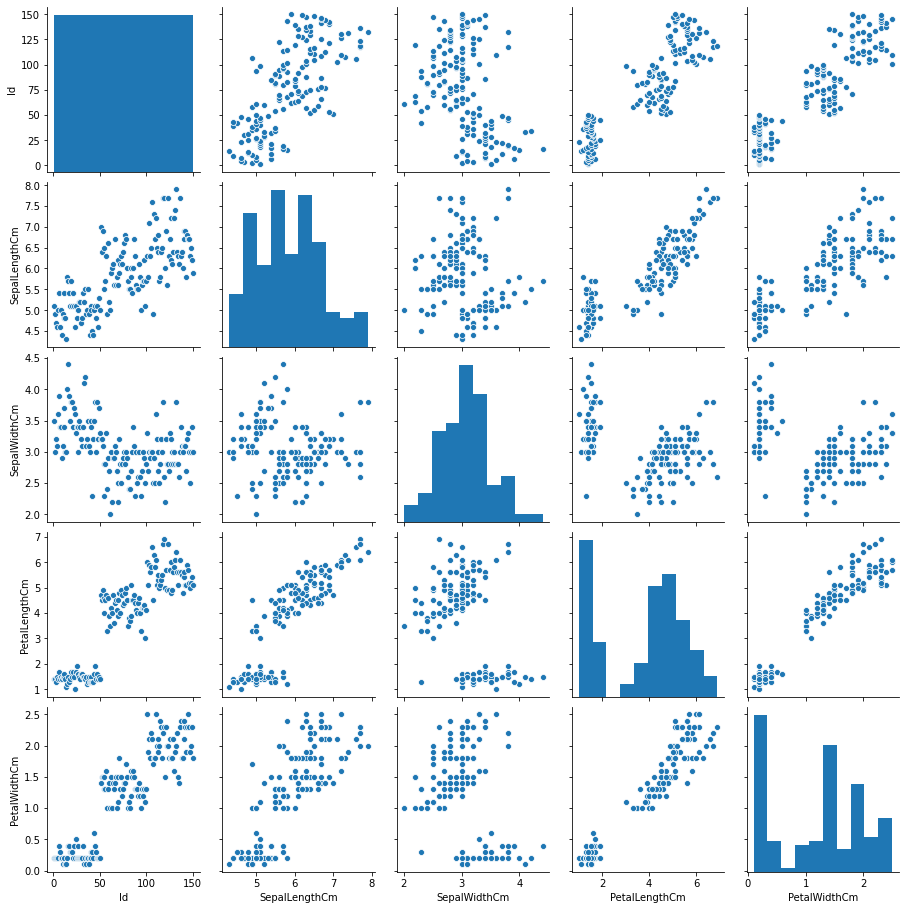

In [6]:
#plotting data
sns.pairplot(df)

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

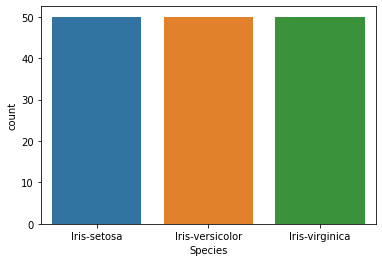

In [7]:
# To count Species
sns.countplot(x=df['Species'],data=df)
df['Species'].value_counts()

In [8]:
X=df.iloc[:,[3,4]].values


## To Find Best K value KMeans Clustering by elbow method

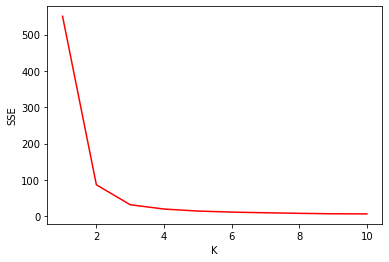

In [9]:
k=range(1,11)
sse=[]
for i in k:
    from sklearn.cluster import KMeans
    clf=KMeans(n_clusters=i)
    clf.fit(X)
    sse.append(clf.inertia_)
plt.plot(k,sse,color='red')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

## Now We Find K value = 3 as shown in graph


## K Means Clustering Method

In [10]:
# import clustering Kmeans algo.
from sklearn.cluster import KMeans
clf=KMeans(n_clusters=3)
y_pred=clf.fit_predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Add cluster in data

In [36]:

df['cluster']=y_pred
df.head

<bound method NDFrame.head of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  cluster  
0       Iris-setosa        1  
1       Iris-setosa        1  
2       Iris-setosa        1  
3    

## Check Centroid of cluster

In [12]:
clf.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.464     , 0.244     ],
       [5.59583333, 2.0375    ]])

In [13]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

## Visualize the clusters 

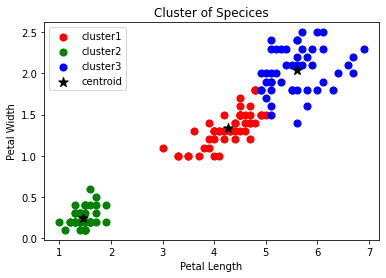

In [24]:
plt.scatter(df1.PetalLengthCm,df1.PetalWidthCm,s=50,color='red',label='cluster1')
plt.scatter(df2.PetalLengthCm,df2.PetalWidthCm,s=50,color='green',label='cluster2')
plt.scatter(df3.PetalLengthCm,df3.PetalWidthCm,s=50,color='blue',label='cluster3')
plt.scatter(clf.cluster_centers_[:,0],clf.cluster_centers_[:,1],color='black',s=100,marker='*',label='centroid')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Cluster of Specices')
plt.legend()
plt.show()

## Hierarchical Clustering Method

## To plot Dendogram

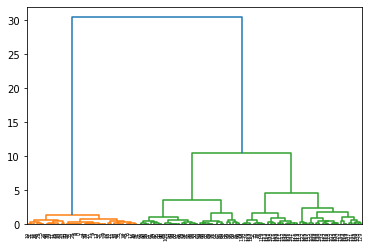

In [35]:
## To plot Dendogram import scipy library
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
plt.show()


## Perform Agglomerative clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=3)
y_agg=agg.fit_predict(X)

In [18]:
y_agg

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Visualization of Clusters

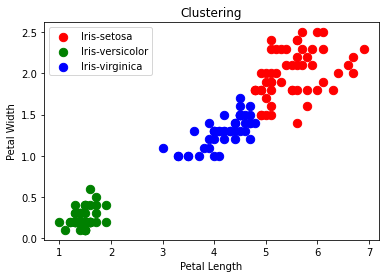

In [37]:
plt.scatter(X[y_agg==0,0],X[y_agg==0,1],color='red',s=70,label='Iris-setosa')
plt.scatter(X[y_agg==1,0],X[y_agg==1,1],color='green',s=70,label='Iris-versicolor')
plt.scatter(X[y_agg==2,0],X[y_agg==2,1],color='blue',s=70,label='Iris-virginica ')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Clustering')
plt.legend()
plt.show()